In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [3]:
song_tag = pd.read_csv('/content/drive/MyDrive/집교 2_Team P/LFM-2b_tags_fixed.csv')
song_tag.head()

,Unnamed: 0,tags,i,artist,track
0,0,"{'indie': 100, 'alternative': 79, 'electronic'...",36346257,Gotye,Somebody That I Used to Know
1,1,"{'soul': 100, 'Adele': 95, 'female vocalists':...",33619193,Adele,Rolling in the Deep
2,2,"{'indie': 100, 'rock': 97, 'alternative': 94, ...",32496162,Imagine Dragons,Radioactive
3,3,"{'female vocalists': 100, 'pop': 96, 'indie': ...",43433165,Lana Del Rey,Video Games
4,4,"{'indie': 100, 'indie pop': 69, 'catchy': 38, ...",32083560,Foster the People,Pumped Up Kicks


In [4]:
song_tag.shape

(2230814, 5)

In [5]:
song_lyrics = pd.read_csv('/content/drive/MyDrive/집교 2_Team P/songdata.csv')
song_lyrics.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [6]:
song_lyrics.shape

(57650, 4)

In [9]:
import ast
song_tag['tags'] = song_tag['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# 'tags' 열에서 첫 번째 키-값 쌍을 추출하여 'first_tag' 열에 저장
song_tag['first_tag'] = song_tag['tags'].apply(lambda x: next(iter(x.items()), ('','')) if isinstance(x, dict) else None)

print(song_tag)

         Unnamed: 0                                               tags  \
0                 0  {'indie': 100, 'alternative': 79, 'electronic'...   
1                 1  {'soul': 100, 'Adele': 95, 'female vocalists':...   
2                 2  {'indie': 100, 'rock': 97, 'alternative': 94, ...   
3                 3  {'female vocalists': 100, 'pop': 96, 'indie': ...   
4                 4  {'indie': 100, 'indie pop': 69, 'catchy': 38, ...   
...             ...                                                ...   
2230809     2230809          {'andre rieu': 100, 'special kikke': 100}   
2230810     2230810  {'jazz': 100, 'vocal jazz': 50, 'Jazz Vocal Ta...   
2230811     2230811  {'Electroclash': 100, 'electro': 100, 'techno'...   
2230812     2230812  {'80s': 100, 'Progressive rock': 97, 'classic ...   
2230813     2230813                        {'60s': 100, 'oldies': 100}   

                i                artist                         track  \
0        36346257                 Goty

In [10]:
song_tag.head()

,Unnamed: 0,tags,i,artist,track,first_tag
0,0,"{'indie': 100, 'alternative': 79, 'electronic'...",36346257,Gotye,Somebody That I Used to Know,"(indie, 100)"
1,1,"{'soul': 100, 'Adele': 95, 'female vocalists':...",33619193,Adele,Rolling in the Deep,"(soul, 100)"
2,2,"{'indie': 100, 'rock': 97, 'alternative': 94, ...",32496162,Imagine Dragons,Radioactive,"(indie, 100)"
3,3,"{'female vocalists': 100, 'pop': 96, 'indie': ...",43433165,Lana Del Rey,Video Games,"(female vocalists, 100)"
4,4,"{'indie': 100, 'indie pop': 69, 'catchy': 38, ...",32083560,Foster the People,Pumped Up Kicks,"(indie, 100)"


In [14]:
song_tag['first_tag2'] = song_tag['first_tag'].apply(lambda x: x[0] if pd.notna(x) and len(x) > 1 else None)

# 결과 출력
print(song_tag[['first_tag', 'first_tag2']])

                       first_tag        first_tag2
0                   (indie, 100)             indie
1                    (soul, 100)              soul
2                   (indie, 100)             indie
3        (female vocalists, 100)  female vocalists
4                   (indie, 100)             indie
...                          ...               ...
2230809        (andre rieu, 100)        andre rieu
2230810              (jazz, 100)              jazz
2230811      (Electroclash, 100)      Electroclash
2230812               (80s, 100)               80s
2230813               (60s, 100)               60s

[2230814 rows x 2 columns]


In [ ]:
# "first_tag"의 빈도 계산
tag_counts = song_tag['first_tag2'].value_counts()

# 시각화
plt.bar(tag_counts.index, tag_counts.values)
plt.xlabel('First Tag')
plt.ylabel('Count')
plt.title('First Tag Counts')
plt.show()

In [18]:
print(tag_counts[0:20])

rock                93886
electronic          69627
pop                 55254
indie               54009
jazz                52917
Hip-Hop             41377
Soundtrack          34371
black metal         27931
folk                25257
metal               25027
instrumental        24446
punk                24197
ambient             23527
soul                20727
trance              20237
country             20091
classic rock        19871
chillout            19687
Progressive rock    19535
alternative         19386
Name: first_tag2, dtype: int64


In [19]:
song_lyrics.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [20]:
song_lyrics.columns = ['artist','track', 'link', 'text']

In [21]:
merge = pd.merge(song_lyrics, song_tag, how='inner', on='track')
merge.head()

,artist_x,track,link,text,Unnamed: 0,tags,i,artist_y,first_tag,first_tag2
0,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl...",160746,"{'pop': 100, 'abba': 78, 'swedish': 39, '80s':...",4787721,ABBA,"(pop, 100)",pop
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl...",221759,"{'Soundtrack': 100, 'musical': 100, 'abba': 10...",4787729,Lily James,"(Soundtrack, 100)",Soundtrack
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...,197019,"{'pop': 100, 'Disco': 43, 'abba': 43, '70s': 3...",5291822,ABBA,"(pop, 100)",pop
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...,15096,"{'pop': 100, 'brazilian': 54, 'dance': 31, 'fu...",6150506,Anitta,"(pop, 100)",pop
4,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...,57120,"{'indie': 100, 'female vocalists': 69, 'indie ...",6151038,Yeah Yeah Yeahs,"(indie, 100)",indie


In [25]:
merge.drop_duplicates(subset=['track'], inplace=True)
merge.shape

(34887, 10)

In [ ]:
merge.head()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65284 (\N{FULLWIDTH DOLLAR SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


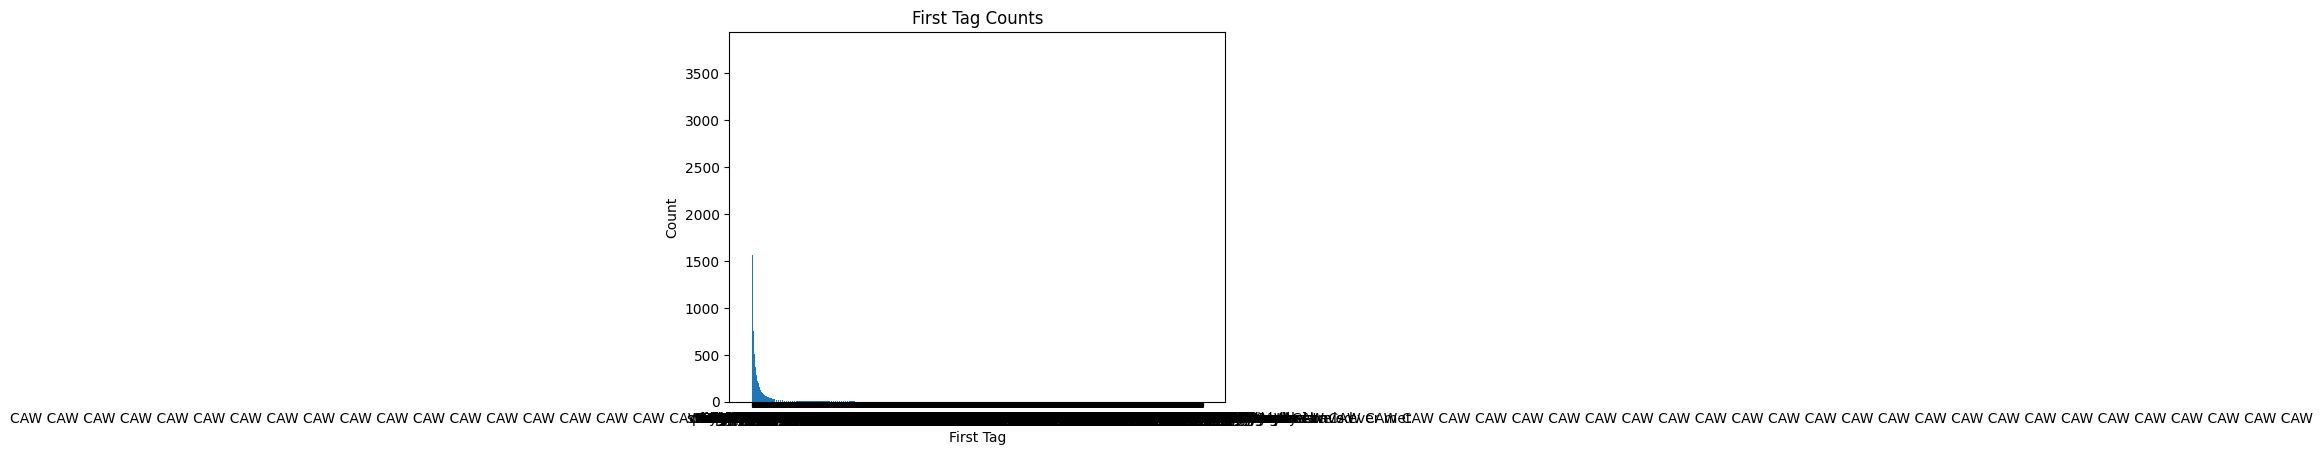

In [28]:
# "first_tag"의 빈도 계산
tag_counts = merge['first_tag2'].value_counts()

# 시각화
plt.bar(tag_counts.index, tag_counts.values)
plt.xlabel('First Tag')
plt.ylabel('Count')
plt.title('First Tag Counts')
plt.show()

In [31]:
print(tag_counts[0:20])

rock                3752
pop                 2463
classic rock        1562
country             1497
hard rock           1016
indie                926
jazz                 829
folk                 787
soul                 755
80s                  681
Progressive rock     642
electronic           636
heavy metal          596
alternative          513
Hip-Hop              506
punk rock            405
female vocalists     404
punk                 399
blues                376
christmas            372
Name: first_tag2, dtype: int64


In [34]:
from collections import Counter
# 'tags' 열에서 세 번째 키-값 쌍까지 추출
merge['tag_list'] = merge['tags'].apply(lambda x: list(x.items())[:3] if isinstance(x, dict) else [])

# 각 행에서의 "first_tag", "second_tag", "third_tag"을 추출
merge['first_tag'] = merge['tag_list'].apply(lambda x: str(x[0][0]) if x else None)
merge['second_tag'] = merge['tag_list'].apply(lambda x: str(x[1][0]) if len(x) > 1 else None)
merge['third_tag'] = merge['tag_list'].apply(lambda x: str(x[2][0]) if len(x) > 2 else None)

# 각 태그의 카운트를 수행하고, 모든 카운트를 합쳐서 최종 결과 생성
all_tags = Counter(merge['first_tag'].tolist() + merge['second_tag'].tolist() + merge['third_tag'].tolist())



Counter({'rock': 9576, 'pop': 4572, None: 4482, 'classic rock': 4027, 'alternative': 2199, 'hard rock': 2120, '80s': 2114, 'female vocalists': 2064, 'indie': 2011, 'country': 1824, 'metal': 1748, 'alternative rock': 1664, 'electronic': 1530, 'folk': 1493, '70s': 1337, 'soul': 1324, 'singer-songwriter': 1266, 'heavy metal': 1253, '60s': 1163, 'jazz': 1140, 'Progressive rock': 1063, 'punk': 1033, 'Hip-Hop': 896, 'new wave': 853, 'punk rock': 790, 'blues': 782, 'dance': 700, 'oldies': 663, 'rap': 662, '90s': 644, 'british': 621, 'indie rock': 601, 'cover': 591, 'acoustic': 553, 'hip hop': 517, 'rnb': 514, 'Soundtrack': 512, 'thrash metal': 440, 'blues rock': 439, 'christmas': 425, 'funk': 421, 'synthpop': 400, 'reggae': 371, 'Grunge': 359, 'chillout': 358, 'Progressive metal': 321, 'britpop': 316, 'metalcore': 305, 'christian': 305, 'instrumental': 304, 'industrial': 286, 'Love': 286, 'pop rock': 285, 'soft rock': 278, 'piano': 277, 'Power metal': 274, 'hardcore': 269, 'Canadian': 257, 'D

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65284 (\N{FULLWIDTH DOLLAR SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


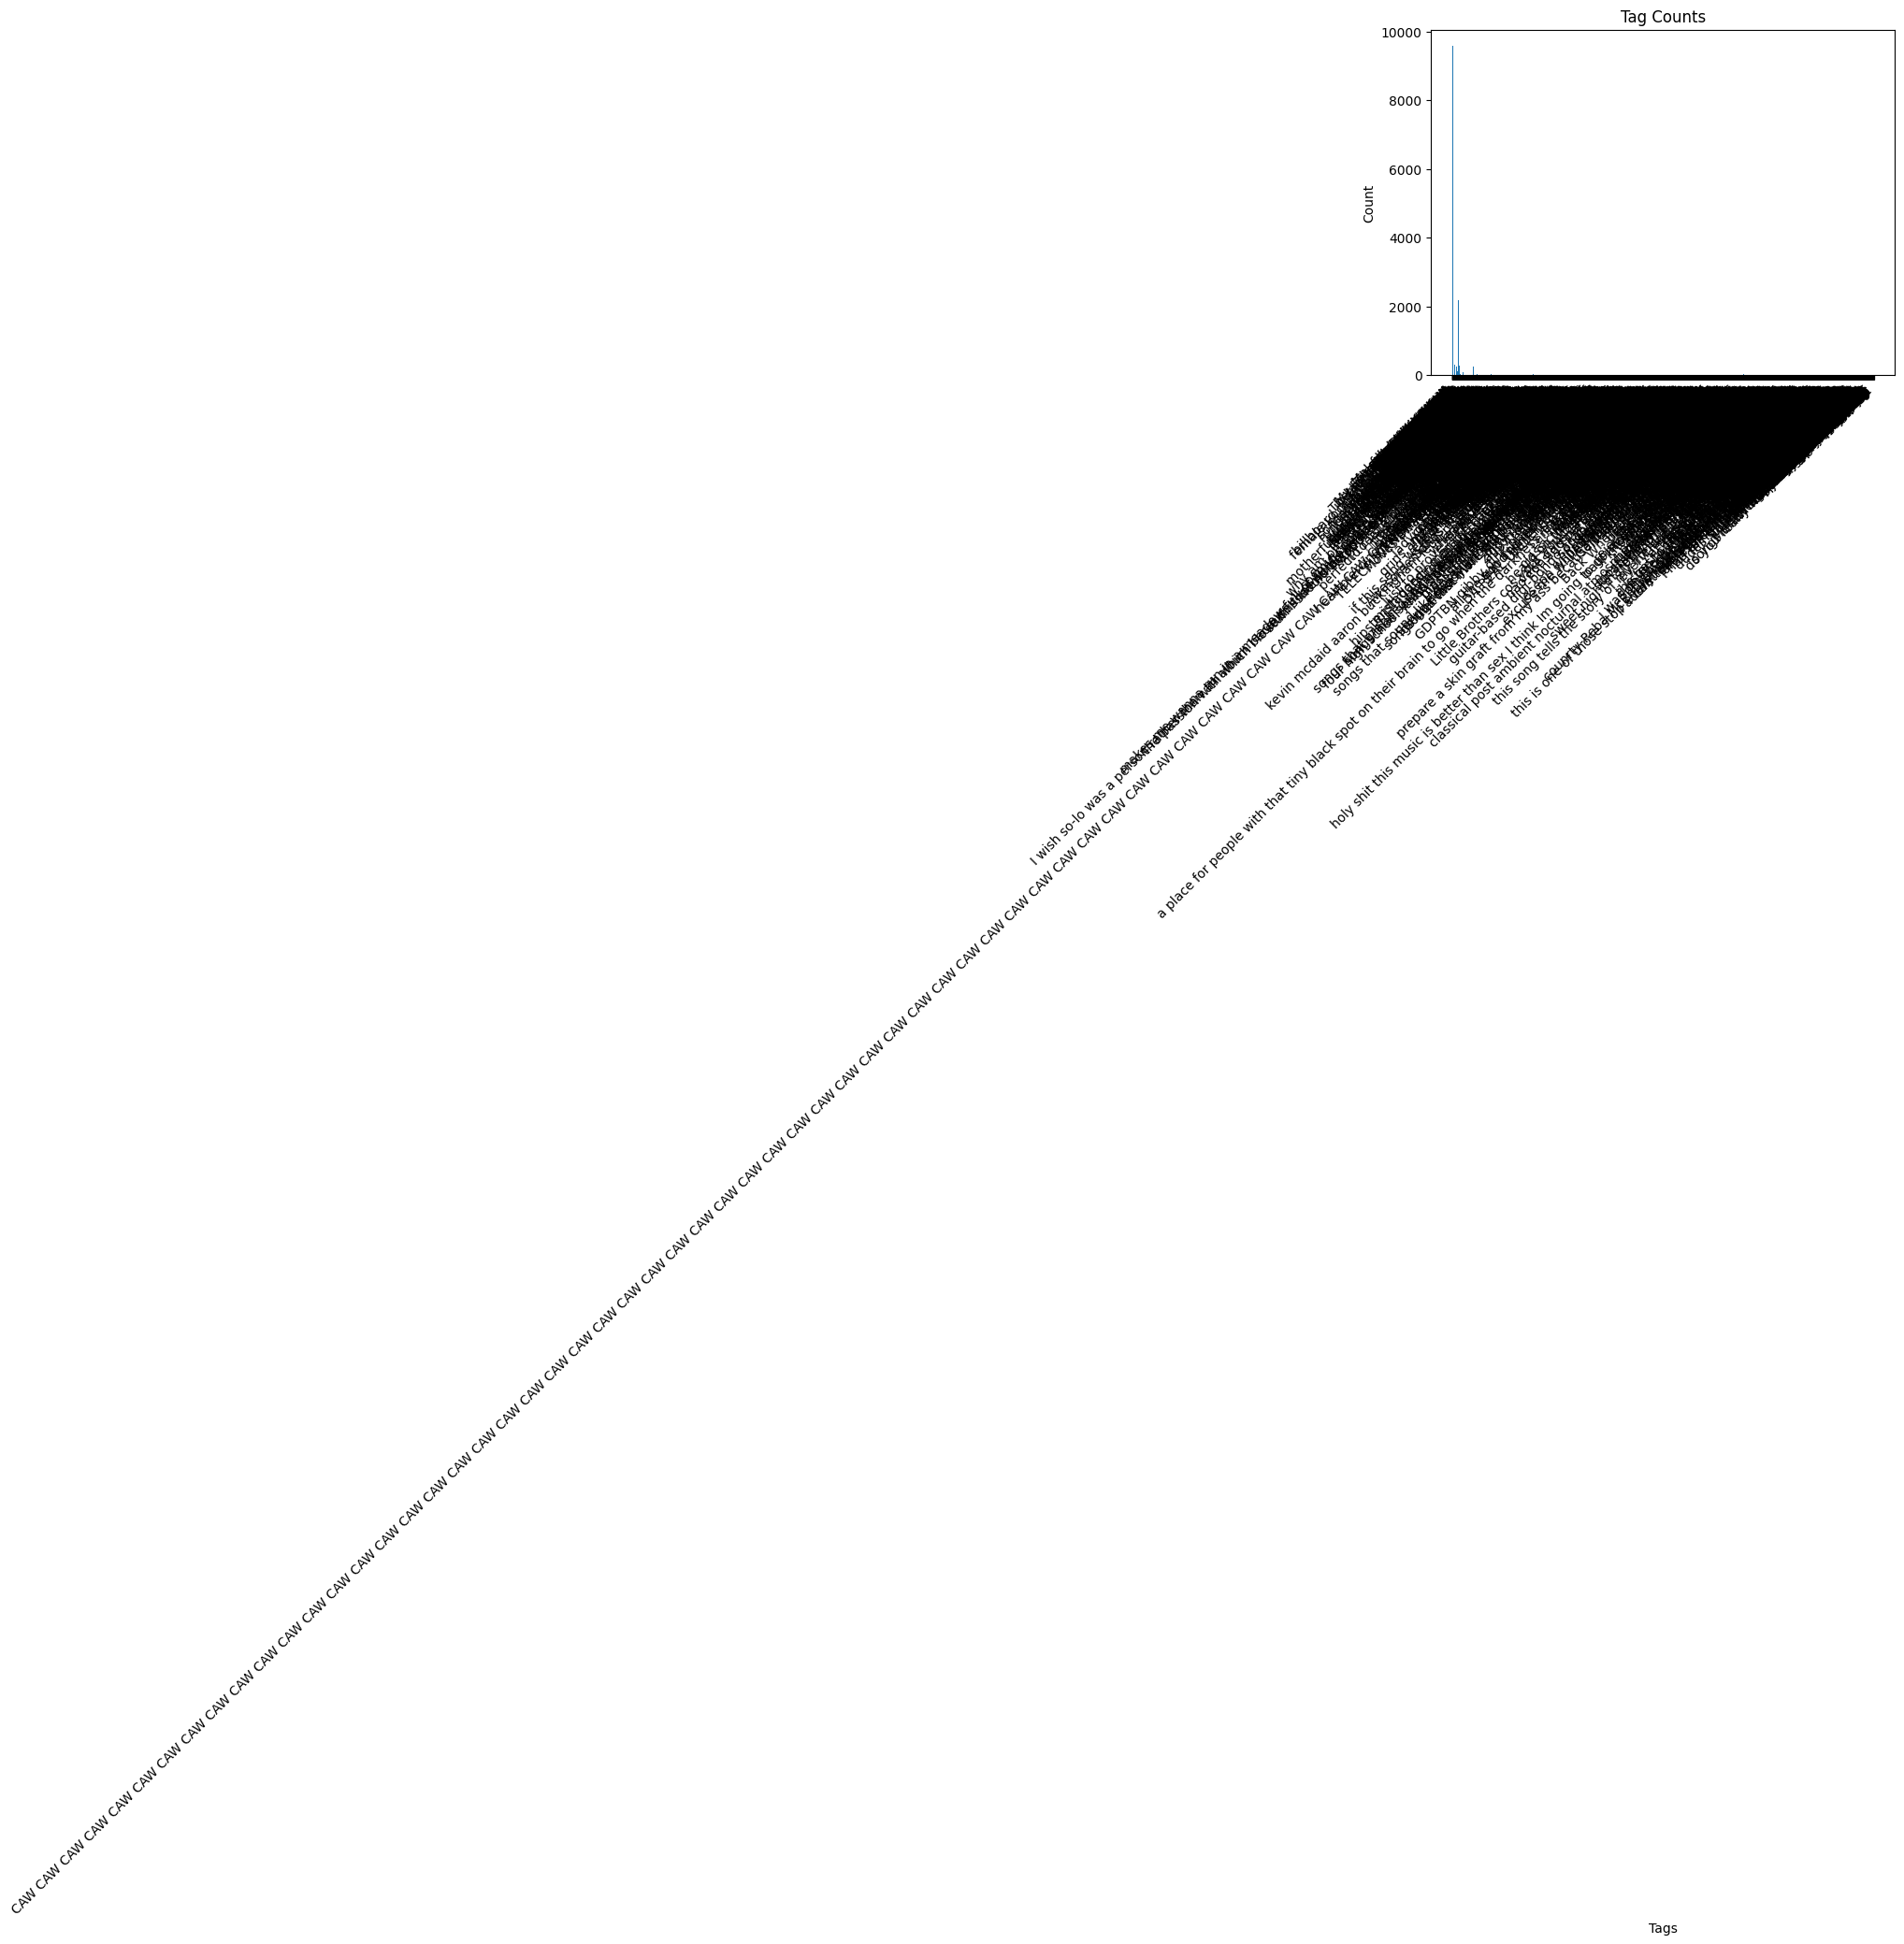

In [38]:
# None 값이 있는지 확인하고 제거
tags, counts = zip(*[(tag, count) for tag, count in all_tags.items() if tag is not None])

# Counter 객체를 바 차트로 시각화
plt.bar(tags, counts)
plt.xlabel('Tags')
plt.ylabel('Count')
plt.title('Tag Counts')
plt.xticks(rotation=45, ha='right')  # 태그를 45도 기울여 표시
plt.show()

In [41]:
print(all_tags.items())

dict_items([('pop', 4572), ('Gothic Metal', 132), ('electropop', 133), ('metalcore', 305), ('heavy metal', 1253), ('indie', 2011), ('dream pop', 100), ('alternative rock', 1664), ('80s', 2114), ('shoegaze', 75), ('Soundtrack', 512), ('cover', 591), ('rock', 9576), ('hard rock', 2120), ('blues', 782), ('female vocalists', 2064), ('chillout', 358), ('Nu Metal', 215), ('dance', 700), ('Melodic Death Metal', 107), ('christmas', 425), ('folk', 1493), ('classic rock', 4027), ('riot grrrl', 10), ('punk rock', 790), ('downtempo', 125), ('comedy', 150), ('soul', 1324), ('electro', 81), ('Adele', 5), ('chill', 124), ('hardcore', 269), ('industrial', 286), ('60s', 1163), ('piano rock', 16), ('love songs', 65), ('funk', 421), ('country', 1824), ('post-punk', 222), ('electronic', 1530), ('rock n roll', 110), ('new wave', 853), ('pop punk', 188), ('jazz', 1140), ('blues rock', 439), ('britpop', 316), ('reggae', 371), ('Hip-Hop', 896), ('gospel', 134), ('swing', 170), ('asap ferg', 1), ('70s', 1337),

In [43]:
def ict_items(all_tags):
    sorted_tags = sorted(all_tags, key=lambda x: x[1], reverse=True)
    top_20_tags = sorted_tags[:40]

    for tag in top_20_tags:
        print(tag)
ict_items(all_tags.items())

('rock', 9576)
('pop', 4572)
(None, 4482)
('classic rock', 4027)
('alternative', 2199)
('hard rock', 2120)
('80s', 2114)
('female vocalists', 2064)
('indie', 2011)
('country', 1824)
('metal', 1748)
('alternative rock', 1664)
('electronic', 1530)
('folk', 1493)
('70s', 1337)
('soul', 1324)
('singer-songwriter', 1266)
('heavy metal', 1253)
('60s', 1163)
('jazz', 1140)
('Progressive rock', 1063)
('punk', 1033)
('Hip-Hop', 896)
('new wave', 853)
('punk rock', 790)
('blues', 782)
('dance', 700)
('oldies', 663)
('rap', 662)
('90s', 644)
('british', 621)
('indie rock', 601)
('cover', 591)
('acoustic', 553)
('hip hop', 517)
('rnb', 514)
('Soundtrack', 512)
('thrash metal', 440)
('blues rock', 439)
('christmas', 425)


In [44]:
merge_last = pd.read_csv('/content/drive/MyDrive/집교 2_Team P/merged_last.csv')
merge_last.head()

,Unnamed: 0,artist_id,artist_name,track_id,track_name,text,user_id,album_id,listen_count,listen_count_bin,tags,i
0,0,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,21072247,2,9,9,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
1,1,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,32226961,2,14,10~2704,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
2,2,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,2115525,2,16,10~2704,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
3,3,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,4812967,2113,4,4,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
4,4,1,Megadeth,2,Hangar 18,Welcome to our fortress tall \nTake some time...,21211675,2,1,1,"{'thrash metal': 100, 'metal': 46, 'heavy meta...",17680134
